In [16]:
from data import MNIST
from mmdew_adapter import MMDEWAdapter
from mmdew.mmd import MMD

In [17]:
from sklearn import preprocessing
import numpy as np
def preprocess(x):
    return preprocessing.minmax_scale(x)
mnist = MNIST(preprocess=preprocess)

In [18]:

cps = mnist._change_points
true_cps = [i for i, x in enumerate(cps) if x]
fst_cps = true_cps[0]
snd_cps = true_cps[1]
fst_cps
print(true_cps)

[6825, 13783, 20773, 27597, 34738, 41614, 47927, 54830, 62123]


In [19]:
cps[0]

False

In [45]:


mymmd=MMD(biased=True)


mmd_nys1 = MMDEWAdapter(1, alpha=1e-16)
pre_train_data = np.array(
                [mnist.next_sample()[0] for _ in range(100)]
            ).squeeze(1)
mmd_nys1.pre_train(data=pre_train_data)
mnist.restart()

In [46]:
import pandas as pd
x1 = []
y1 = []
for i in range(snd_cps +1):
    valid = False
    #print(i)
    next_sample, _, is_change = mnist.next_sample()
    mmd_nys1.add_element(next_sample)
    if i >= (fst_cps-1):
        split = 1
        ucap_sum = 0
        bucket_index = 0
        finished = False
        while bucket_index  < len(mmd_nys1.detector.buckets) and not finished:
            #print("hello")
            ucap_sum += mmd_nys1.detector.buckets[bucket_index].uncompressed_capacity
            print("bucket index:", bucket_index)
            print("ucap sum:", ucap_sum)
            if ucap_sum <= fst_cps-1:

                split = bucket_index + 1
                bucket_index += 1
            else:
                finished = True
        bsstring = ""
        for j in range(0, len(mmd_nys1.detector.buckets)):
            bsstring += "(" + str(mmd_nys1.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys1.detector.buckets[j].weights)) + ")"
        print(split)
        print(len(mmd_nys1.detector.buckets))
        print("element sum", ucap_sum)

        if len(mmd_nys1.detector.buckets) > 1:
            valid = True
            mmdcalc = mmd_nys1.detector.mmd(split)[0]
        print(f"elements read: {i+1}, current bs stream length: {len(mmd_nys1.detector.buckets)} stream: {bsstring} mmd between pre and post: {mmdcalc} with a split at: {split}")

    else:
        print(f"elements read: {i+1}")
    x1.append(i)
    if not valid:
        y1.append(float("NaN"))
    else:

        y1.append(mmdcalc)

elements read: 1
elements read: 2
elements read: 3
elements read: 4
elements read: 5
elements read: 6
elements read: 7
elements read: 8
elements read: 9
elements read: 10
elements read: 11
elements read: 12
elements read: 13
elements read: 14
elements read: 15
elements read: 16
elements read: 17
elements read: 18
elements read: 19
elements read: 20
elements read: 21
elements read: 22
elements read: 23
elements read: 24
elements read: 25
elements read: 26
elements read: 27
elements read: 28
elements read: 29
elements read: 30
elements read: 31
elements read: 32
elements read: 33
elements read: 34
elements read: 35
elements read: 36
elements read: 37
elements read: 38
elements read: 39
elements read: 40
elements read: 41
elements read: 42
elements read: 43
elements read: 44
elements read: 45
elements read: 46
elements read: 47
elements read: 48
elements read: 49
elements read: 50
elements read: 51
elements read: 52
elements read: 53
elements read: 54
elements read: 55
elements read: 56
e

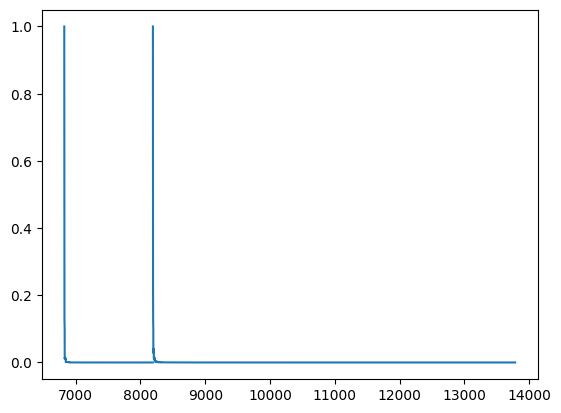

In [47]:
import matplotlib.pyplot as plt
x1_np = np.array(x1)
y1_np = np.array(y1)
# def convert_to_float(s):
#     if s == 'nan':
#         return np.nan
#     else:
#         # Extract the first value from the tuple-like string
#         float_val = float(s.split(',')[0].strip('('))
#         return float_val



plt.plot(x1_np,y1_np)
plt.show()


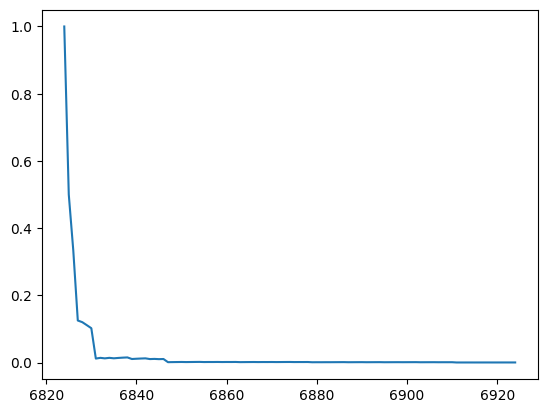

In [53]:

plt.plot(x1_np[fst_cps-10:fst_cps+100],y1_np[fst_cps-10:fst_cps+100])
plt.show()

Ok, lets try to understand what is happening here. Lets insert exactly the dapapoints until the first changepoint. Let us then individually look at mmd after each insert.

In [24]:

mnist.restart()
mmd_nys = MMDEWAdapter(1, alpha=1e-16)
pre_train_data = np.array(
                [mnist.next_sample()[0] for _ in range(100)]
            ).squeeze(1)
mmd_nys.pre_train(data=pre_train_data)
x2 = []
y2 = []
for i in range(fst_cps):

    #print(i)
    next_sample, _, is_change = mnist.next_sample()
    mmd_nys.add_element(next_sample)
    print("elements read", i)
    

elements read 0
elements read 1
elements read 2
elements read 3
elements read 4
elements read 5
elements read 6
elements read 7
elements read 8
elements read 9
elements read 10
elements read 11
elements read 12
elements read 13
elements read 14
elements read 15
elements read 16
elements read 17
elements read 18
elements read 19
elements read 20
elements read 21
elements read 22
elements read 23
elements read 24
elements read 25
elements read 26
elements read 27
elements read 28
elements read 29
elements read 30
elements read 31
elements read 32
elements read 33
elements read 34
elements read 35
elements read 36
elements read 37
elements read 38
elements read 39
elements read 40
elements read 41
elements read 42
elements read 43
elements read 44
elements read 45
elements read 46
elements read 47
elements read 48
elements read 49
elements read 50
elements read 51
elements read 52
elements read 53
elements read 54
elements read 55
elements read 56
elements read 57
elements read 58
element

In [25]:
bsstring = ""
for j in range(0, len(mmd_nys.detector.buckets)):
    bsstring += "(" + str(mmd_nys.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys.detector.buckets[j].weights)) + ")"
print(bsstring)
mmd_nys.detector.mmd(6)

(4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(1 1)


(1.0000016105832223, 6824, 1)

In [43]:
def getSplitAndPrint():
    split = 1
    ucap_sum = 0
    bucket_index = 0
    finished = False
    while bucket_index  < len(mmd_nys.detector.buckets) and not finished:
        #print("hello")
        ucap_sum += mmd_nys.detector.buckets[bucket_index].uncompressed_capacity

        if ucap_sum <= fst_cps-1:

            split = bucket_index + 1
            bucket_index += 1
        else:
            finished = True
    bsstring = ""
    for j in range(0, len(mmd_nys.detector.buckets)):
        bsstring += "(" + str(mmd_nys.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys.detector.buckets[j].weights)) + ")"
    print("state:", bsstring)
    print(split)
    return split

def addElement():
    next_sample, _, is_change = mnist.next_sample()
    mmd_nys.add_element(next_sample)

In [38]:
split = 1
ucap_sum = 0
bucket_index = 0
finished = False
while bucket_index  < len(mmd_nys.detector.buckets) and not finished:
    #print("hello")
    ucap_sum += mmd_nys.detector.buckets[bucket_index].uncompressed_capacity

    if ucap_sum <= fst_cps-1:

        split = bucket_index + 1
        bucket_index += 1
    else:
        finished = True
bsstring = ""
for j in range(0, len(mmd_nys.detector.buckets)):
    bsstring += "(" + str(mmd_nys.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys.detector.buckets[j].weights)) + ")"
print(bsstring)
print(split)
print(mmd_nys.detector.mmd(split))

(4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(1 1)
6
(1.0000016105832223, 6824, 1)


In [39]:
next_sample, _, is_change = mnist.next_sample()
mmd_nys.add_element(next_sample)
split = 1
ucap_sum = 0
bucket_index = 0
finished = False
while bucket_index  < len(mmd_nys.detector.buckets) and not finished:
    #print("hello")
    ucap_sum += mmd_nys.detector.buckets[bucket_index].uncompressed_capacity

    if ucap_sum <= fst_cps-1:

        split = bucket_index + 1
        bucket_index += 1
    else:
        finished = True
bsstring = ""
for j in range(0, len(mmd_nys.detector.buckets)):
    bsstring += "(" + str(mmd_nys.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys.detector.buckets[j].weights)) + ")"
print(bsstring)
print(split)
print(mmd_nys.detector.mmd(split))

(4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(2 2)
6
(0.5000016005832225, 6824, 2)


In [40]:
next_sample, _, is_change = mnist.next_sample()
mmd_nys.add_element(next_sample)
split = 1
ucap_sum = 0
bucket_index = 0
finished = False
while bucket_index  < len(mmd_nys.detector.buckets) and not finished:
    #print("hello")
    ucap_sum += mmd_nys.detector.buckets[bucket_index].uncompressed_capacity

    if ucap_sum <= fst_cps-1:

        split = bucket_index + 1
        bucket_index += 1
    else:
        finished = True
bsstring = ""
for j in range(0, len(mmd_nys.detector.buckets)):
    bsstring += "(" + str(mmd_nys.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys.detector.buckets[j].weights)) + ")"
print(bsstring)
print(split)
print(mmd_nys.detector.mmd(split))

(4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(2 2)(1 1)
6
(0.3333349394721112, 6824, 3)


In [41]:
next_sample, _, is_change = mnist.next_sample()
mmd_nys.add_element(next_sample)
split = 1
ucap_sum = 0
bucket_index = 0
finished = False
while bucket_index  < len(mmd_nys.detector.buckets) and not finished:
    #print("hello")
    ucap_sum += mmd_nys.detector.buckets[bucket_index].uncompressed_capacity

    if ucap_sum <= fst_cps-1:

        split = bucket_index + 1
        bucket_index += 1
    else:
        finished = True
bsstring = ""
for j in range(0, len(mmd_nys.detector.buckets)):
    bsstring += "(" + str(mmd_nys.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys.detector.buckets[j].weights)) + ")"
print(bsstring)
print(split)
print(mmd_nys.detector.mmd(split))

(4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(4 2)
6
(0.12500160683322237, 6824, 4)


In [44]:
for i in range(4):
    addElement()
    print(mmd_nys.detector.mmd(getSplitAndPrint()))

state: (4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(4 2)(1 1)
6
(0.12000160818322234, 6824, 5)
state: (4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(4 2)(2 2)
6
(0.11111271891655565, 6824, 6)
state: (4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(4 2)(2 2)(1 1)
6
(0.10204242486893658, 6824, 7)
state: (4096 64)(2048 46)(512 23)(128 12)(32 6)(16 4)
5
(0.011720342265288296, 6816, 16)


In [28]:
[i for i, x in enumerate(mnist._change_points) if x]

[6825, 13783, 20773, 27597, 34738, 41614, 47927, 54830, 62123]

Ok, so we are about to add the

In [29]:
print(y_np[100:])



[           nan            nan            nan ... 2.94488967e-06
 2.97605601e-06 2.91126273e-06]


In [30]:
k = y_np[10000].split(",")

AttributeError: 'numpy.float64' object has no attribute 'split'

In [ ]:
y_np[1000]

'nan'

In [ ]:
k[0][1:]

'1.1976957441986184e-05'

In [ ]:
float(k[0][1:])

1.1976957441986184e-05